### Importing dataset

In [4]:
import pandas as pd
import numpy as np

In [127]:
df1 = pd.read_csv("./UNSW-NB15_1.csv")
df2 = pd.read_csv("./UNSW-NB15_2.csv")
df3 = pd.read_csv("./UNSW-NB15_3.csv")
df4 = pd.read_csv("./UNSW-NB15_4.csv")

print("Length of df1: ", len(df1))
print("Length of df2: ", len(df2))
print("Length of df3: ", len(df3))
print("Length of df4: ", len(df4))

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Length of df1:  700001
Length of df2:  700001
Length of df3:  700001
Length of df4:  440044


### UNSW-NB15 Features

The description of the labels of the data can be found in the UNSW-NB15_Features files, and are described as follows:

In [3]:
shape1 = df1.shape
shape2 = df2.shape
shape3 = df3.shape
shape4 = df4.shape

In [4]:
shape1, shape2, shape3, shape4

((700001, 49), (700001, 49), (700001, 49), (440044, 49))

In [5]:
features = pd.read_csv("./UNSW-NB15_features.csv",encoding='cp1252')
features

,No,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


### Preprocessing dataset

Concatenating both the train and test set into one main dataset for easy access to all data - making clean up and feature engineering easier.

In [128]:
df = pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True)
df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,...,1.191902e+06,1.110168e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,...,2.345856e-01,3.969940e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,...,7.940924e-01,1.996589e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [151]:
shape = df.shape

In [217]:
shape

(2540047, 49)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

Checking for any duplicated values in the dataset so that we are able to remove them.

In [154]:
print("Duplicated:", df.duplicated().sum())

Duplicated: 480630


In [155]:
df = df.drop_duplicates()

In [156]:
print("Duplicated:", df.duplicated().sum())

Duplicated: 0


In [157]:
print("Null values:")
print(df.isna().sum())

Null values:
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_i

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059417 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

We can drop the ID column as pandas dataframes already come with IDs, and they are purely for identification purposes. We will also be dropping the 'Attack category' column as this is a binary identification project, and we do not need to know what type of an attack it is.

In [159]:
df.sample(10)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
1620111,59.166.0.5,41324,149.171.126.4,80,tcp,FIN,1.005529,1580,10168,31,...,,1,2,2,1,1,1,2,NaN,0
866810,59.166.0.2,47755,149.171.126.6,52801,tcp,FIN,0.042732,3494,44558,31,...,0,9,12,5,7,1,1,1,NaN,0
249718,59.166.0.1,34147,149.171.126.8,80,tcp,FIN,1.014749,1580,10168,31,...,0,2,1,2,2,2,1,1,NaN,0
2316243,59.166.0.2,46674,149.171.126.5,80,tcp,FIN,1.159990,1684,10168,31,...,,3,1,3,6,1,1,2,NaN,0
177365,59.166.0.9,45668,149.171.126.4,53,udp,CON,0.001066,130,162,31,...,0,17,7,1,5,2,1,1,NaN,0
703574,59.166.0.4,31931,149.171.126.8,5190,tcp,FIN,0.283121,1244,2574,31,...,0,15,13,6,9,1,1,5,NaN,0
2146074,175.45.176.0,0,149.171.126.17,0,unas,INT,0.000006,200,0,254,...,,5,5,2,2,2,2,5,Reconnaissance,1
1852734,59.166.0.6,46701,149.171.126.7,21,tcp,FIN,2.417752,2934,3742,31,...,1,2,1,5,5,1,1,5,NaN,0
1310982,59.166.0.2,20497,149.171.126.4,16865,tcp,FIN,0.043403,5486,92746,31,...,,4,13,2,5,1,1,1,NaN,0
927220,59.166.0.4,26401,149.171.126.0,21,tcp,FIN,5.142451,2934,3742,31,...,0,2,1,4,4,2,1,2,NaN,0


In [160]:
attack_cat = df['attack_cat']

In [161]:
df = df.drop(columns=['attack_cat'])

In [162]:
df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,...,1.125814e+06,1.045252e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06,2.059417e+06
mean,6.510258e-01,5.098048e+03,4.192614e+04,4.359533e+01,3.650119e+01,6.113904e+00,1.893133e+01,9.066796e+06,2.954291e+06,3.864582e+01,...,2.174604e-01,3.823671e-02,5.405661e+00,5.159026e+00,3.672183e+00,4.164914e+00,1.619754e+00,1.252033e+00,2.651250e+00,4.838505e-02
std,1.104386e+01,6.213721e+04,1.698574e+05,5.052129e+01,4.370307e+01,2.457746e+01,5.952635e+01,7.363603e+07,4.480340e+06,8.047442e+01,...,6.579614e-01,1.944919e-01,5.187873e+00,5.004024e+00,3.261093e+00,3.599998e+00,2.657990e+00,1.753048e+00,4.141453e+00,2.145786e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.592000e-03,4.240000e+02,3.040000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,8.077723e+04,7.632187e+04,4.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.641600e-02,1.684000e+03,3.080000e+03,3.100000e+01,2.900000e+01,4.000000e+00,5.000000e+00,5.407408e+05,6.691802e+05,1.600000e+01,...,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,3.341490e-01,3.728000e+03,1.991800e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.500000e+01,1.095758e+06,3.835414e+06,4.800000e+01,...,0.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [163]:
df.sample(10)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
1811088,59.166.0.3,6655,149.171.126.3,80,tcp,FIN,1.238082,1580,10168,31,...,NaN,,2,5,3,5,2,1,1,0
1331171,59.166.0.3,53724,149.171.126.8,143,tcp,FIN,0.032630,7816,16782,31,...,NaN,,1,4,3,3,1,1,1,0
780832,59.166.0.8,62479,149.171.126.8,37829,tcp,FIN,0.011805,2558,22878,31,...,0.0,0,3,4,3,2,1,1,2,0
847572,59.166.0.3,25847,149.171.126.1,53,udp,CON,0.000936,130,162,31,...,0.0,0,4,3,5,4,2,1,3,0
1487485,59.166.0.5,12648,149.171.126.9,38314,tcp,FIN,0.114919,5174,89856,31,...,NaN,,7,6,3,1,1,1,3,0
2091299,59.166.0.4,7948,149.171.126.5,8356,tcp,FIN,0.015896,2438,20006,31,...,NaN,,2,5,2,2,1,1,1,0
2005143,59.166.0.6,53483,149.171.126.2,6881,tcp,FIN,4.964690,24744,1094788,31,...,NaN,,4,7,2,2,2,1,4,0
877240,59.166.0.9,36134,149.171.126.6,14864,tcp,FIN,0.212984,3598,45562,31,...,0.0,0,13,9,5,10,1,1,4,0
1216345,175.45.176.0,47439,149.171.126.12,53,udp,INT,0.000008,114,0,254,...,NaN,,18,18,5,5,5,5,18,1
635706,59.166.0.6,11663,149.171.126.5,14643,udp,CON,0.130998,536,304,31,...,0.0,0,7,7,7,2,1,1,2,0


#### Comparing the ratio of attack to normal data

The data is being labelled either 1 for attack data, or 0 for normal data.

<AxesSubplot:>

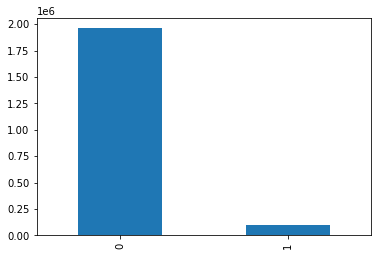

In [164]:
df['Label'].value_counts().plot.bar()

In [129]:
df['Label'].value_counts()

0    2218764
1     321283
Name: Label, dtype: int64

In [165]:
df['Label'].value_counts(normalize=True)

0    0.951615
1    0.048385
Name: Label, dtype: float64

### Data Visualization

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
attacks = attack_cat.value_counts()
attacks

Exploits            27599
Generic             25378
 Fuzzers            17804
 Reconnaissance     11617
DoS                  5665
 Fuzzers             3991
Analysis             2185
Reconnaissance       1740
Backdoor             1684
 Shellcode           1288
Backdoors             300
Shellcode             223
Worms                 171
Name: attack_cat, dtype: int64

In [168]:
attack_cat.value_counts().index.tolist()

['Exploits',
 'Generic',
 ' Fuzzers ',
 ' Reconnaissance ',
 'DoS',
 ' Fuzzers',
 'Analysis',
 'Reconnaissance',
 'Backdoor',
 ' Shellcode ',
 'Backdoors',
 'Shellcode',
 'Worms']

In [169]:
attacks1 = attack_cat.replace({' Fuzzers ':'Fuzzers'})
attacks2 = attacks1.replace({' Fuzzers':'Fuzzers'})
attacks3 = attacks2.replace({' Reconnaissance ':'Reconnaissance'})
total_attacks = attacks3.replace({' Shellcode ':'Shellcode'})

In [170]:
total_attacks.value_counts()

Exploits          27599
Generic           25378
Fuzzers           21795
Reconnaissance    13357
DoS                5665
Analysis           2185
Backdoor           1684
Shellcode          1511
Backdoors           300
Worms               171
Name: attack_cat, dtype: int64

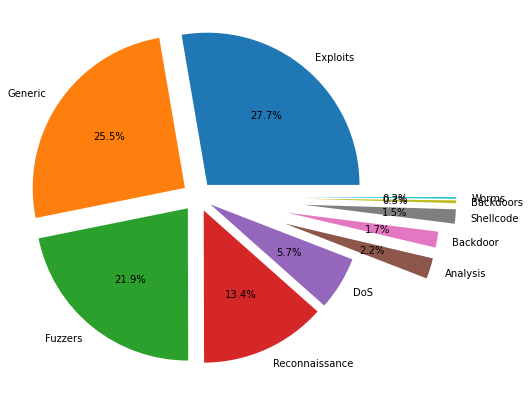

In [173]:
fig = plt.figure(figsize =(10, 7))
plt.pie(total_attacks.value_counts(), labels = total_attacks.value_counts().index, autopct = '%1.1f%%', 
        explode=[0.1,0.1,0.1,0.1,0.1,0.6,0.6,0.7,0.7,0.7])
 
# show plot
plt.show()

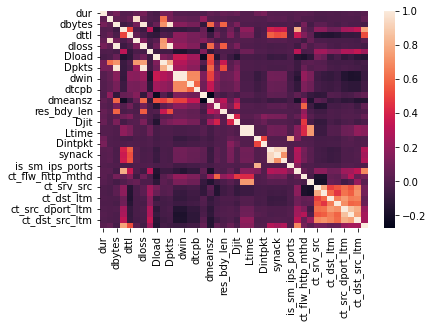

In [174]:
sns.heatmap(df.corr())
plt.show()

### Feature Engineering

Modification to the dataset to simplify the data, to remove any features that are not relevant to our project, as well as adding any new columns for a more comprehensive description to certain features. 

Categorical data would need to be one-hot-encoded so that they become numerical data instead, so that we can feed that data into machine learning algorithms.

#### Sorting the columns according to their data types

In [27]:
categorical_columns = []
continous_columns = []
discrete_columns = []

for x in df.columns:
    if df[x].dtypes == 'O':
        categorical_columns.append(x)
    elif df[x].nunique()>20:
        continous_columns.append(x)  #infinite number of possibilities
    else:
        discrete_columns.append(x)  #finite number of values

In [28]:
categorical_columns

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'service',
 'ct_ftp_cmd']

#### One-Hot Encoding

Label Encoder method changes all categorical datas into numerical values from 1 to *n*, where *n* is the total number of unique datas in that certain columm.

#### One-Hot Encoding

In [29]:
he_df = df.copy()

In [30]:
he_df.sample(10)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
1613917,59.166.0.0,43595,149.171.126.3,30724,tcp,FIN,0.003238,320,1940,31,...,NaN,,3,3,9,6,1,1,5,0
5958,59.166.0.2,27989,149.171.126.8,55727,udp,CON,0.001925,528,304,31,...,0.0,0,7,15,7,3,1,1,3,0
1109526,59.166.0.5,61724,149.171.126.1,53,udp,CON,0.000989,130,162,31,...,NaN,,2,3,1,2,1,1,2,0
70638,59.166.0.0,13661,149.171.126.7,53,udp,CON,0.002408,146,178,31,...,0.0,0,2,2,2,3,2,1,1,0
2502356,59.166.0.4,36022,149.171.126.1,36880,tcp,FIN,0.352116,4776,3080,31,...,NaN,,6,6,6,6,1,1,5,0
1539748,175.45.176.3,29838,149.171.126.11,25,tcp,FIN,0.632293,2718,1104,254,...,NaN,,1,1,1,2,1,1,1,1
2522757,59.166.0.1,47116,149.171.126.2,53,udp,CON,0.001135,146,178,31,...,NaN,,2,3,3,3,2,2,3,0
2097035,59.166.0.2,53916,149.171.126.7,30187,tcp,FIN,0.138810,2646,25564,31,...,NaN,,5,9,2,3,1,1,1,0
196466,59.166.0.9,28645,149.171.126.4,56655,tcp,FIN,0.012687,2438,20718,31,...,0.0,0,12,6,1,4,1,1,1,0
1108369,175.45.176.3,59650,149.171.126.18,1723,tcp,FIN,0.410222,820,354,254,...,NaN,,8,8,3,3,3,1,8,1


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
for x in categorical_columns:
    he_df[x] = he_df[x].astype(str)
    he_df[x] = LabelEncoder().fit_transform(he_df[x])

In [33]:
he_df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,33,4276,24,47344,120,2,0.001055,132,164,31,...,0.0,1,3,7,1,3,1,1,1,0
1,33,26036,27,253,120,2,0.036133,528,304,31,...,0.0,1,2,4,2,3,1,1,2,0
2,39,5091,25,47344,120,2,0.001119,146,178,31,...,0.0,1,12,8,1,2,2,1,1,0
3,38,28534,23,47344,120,2,0.001209,132,164,31,...,0.0,1,6,9,1,1,1,1,1,0
4,36,43654,8,47344,120,2,0.001169,146,178,31,...,0.0,1,7,9,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540039,34,31479,27,62606,114,2,0.564998,14106,772406,31,...,NaN,0,1,1,4,2,2,2,2,0
2540041,34,31479,27,62606,114,2,0.564998,14106,772406,31,...,NaN,0,2,1,4,2,2,2,2,0
2540042,38,25411,25,36803,114,5,0.087306,320,1828,31,...,NaN,0,1,2,3,3,1,1,3,0
2540045,42,27987,8,62606,114,2,2.200934,3498,166054,31,...,NaN,0,1,1,2,4,2,2,2,0


In [34]:
he_df.loc[101271,'proto']

114

However, the Label Encoding method may not be the most accurate to use as the different numerical values from 1 to *n* may be misunderstood by the ML model as different weights of importance - where a bigger number may be more important than a smaller number. However, this is not true as the different numbers represent different data. 

To counter this, we will use the One Hot Encoding method, where different data in the same column will be split up into different separate columns, and the corresponding data will be boolean, where 0 means an absence of that trait, while 1 means that the trait is present for that particular row of data. This way, the numerical data is unweighted and fairly regarded in the model.

In [35]:
ohe_df = pd.get_dummies(data=he_df, columns=['proto', 'service', 'state'])

In [36]:
ohe_df

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,state_6,state_7,state_8,state_9,state_10,state_11,state_12,state_13,state_14,state_15
0,33,4276,24,47344,0.001055,132,164,31,29,0,...,0,0,0,0,0,0,0,0,0,0
1,33,26036,27,253,0.036133,528,304,31,29,0,...,0,0,0,0,0,0,0,0,0,0
2,39,5091,25,47344,0.001119,146,178,31,29,0,...,0,0,0,0,0,0,0,0,0,0
3,38,28534,23,47344,0.001209,132,164,31,29,0,...,0,0,0,0,0,0,0,0,0,0
4,36,43654,8,47344,0.001169,146,178,31,29,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540039,34,31479,27,62606,0.564998,14106,772406,31,29,2,...,0,0,0,0,0,0,0,0,0,0
2540041,34,31479,27,62606,0.564998,14106,772406,31,29,2,...,0,0,0,0,0,0,0,0,0,0
2540042,38,25411,25,36803,0.087306,320,1828,31,29,1,...,0,0,0,0,0,0,0,0,0,0
2540045,42,27987,8,62606,2.200934,3498,166054,31,29,2,...,0,0,0,0,0,0,0,0,0,0


In [37]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059417 entries, 0 to 2540046
Columns: 209 entries, srcip to state_15
dtypes: float64(12), int32(5), int64(28), uint8(164)
memory usage: 1.0 GB


### Splitting training and testing sets

First, we will set the Y labels to be the *label* column from the dataframe, then remove the *label* from the dataframe to get the X variables portion.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
Y = ohe_df['Label']

X = ohe_df.copy()
X = X.drop(columns=['Label'])

feature_list = list(X.columns)

X = np.array(X)

Next, we will split the dataframe into 60% training data, and 40% testing and validation data.

In [40]:
X_train, X_testval, Y_train, Y_testval = train_test_split(X, Y, test_size = 0.4)

In [41]:
len(X), len(Y), len(X_train), len(Y_train), len(X_testval), len(Y_testval)

(2059417, 2059417, 1235650, 1235650, 823767, 823767)

Then, we will split the 40% testing and validation data set into 20% testing and 20% validation data.

In [42]:
X_test, X_val, Y_test, Y_val = train_test_split(X_testval,Y_testval, test_size = 0.5)

In [43]:
len(X_testval), len(Y_testval), len(X_test), len(Y_test), len(X_val), len(Y_val)

(823767, 823767, 411883, 411883, 411884, 411884)

In [44]:
feature_list

['srcip',
 'sport',
 'dstip',
 'dsport',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'proto_0',
 'proto_1',
 'proto_2',
 'proto_3',
 'proto_4',
 'proto_5',
 'proto_6',
 'proto_7',
 'proto_8',
 'proto_9',
 'proto_10',
 'proto_11',
 'proto_12',
 'proto_13',
 'proto_14',
 'proto_15',
 'proto_16',
 'proto_17',
 'proto_18',
 'proto_19',
 'proto_20',
 'proto_21',
 'proto_22',
 'proto_23',
 'proto_24',
 'proto_25',
 'proto_26',
 'proto_27',
 'proto_28',
 'proto_29',
 'proto_30',
 'proto_31',
 'proto_32',
 'proto_33',
 'proto_34',
 'pro

### Ensuring datasets are suitable

In [45]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [47]:
from keras.utils import to_categorical

In [48]:
print(X_train.shape)

(1235650, 208)


Reshaping the X and Y data sets so that the data will be a suitable shape to fit with the model.

In [49]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
Y_train_encoded = to_categorical(Y_train, num_classes=2)

In [50]:
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))
Y_test_encoded = to_categorical(Y_test, num_classes=2)

In [51]:
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1, 1))
Y_val_encoded = to_categorical(Y_val, num_classes=2)

#### Model Training

In [52]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(208,1,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(2, activation="softmax")
])

In [53]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [54]:
modelResult = model.fit(X_train_reshaped, Y_train_encoded, epochs=20, batch_size=32,
                    validation_data=(X_val_reshaped, Y_val_encoded))

Epoch 1/20
38615/38615 [==============================] - 1176s 30ms/step - loss: nan - accuracy: 0.9516 - val_loss: nan - val_accuracy: 0.9513
Epoch 2/20
38615/38615 [==============================] - 1223s 32ms/step - loss: nan - accuracy: 0.9516 - val_loss: nan - val_accuracy: 0.9513
Epoch 3/20
38615/38615 [==============================] - 916s 24ms/step - loss: nan - accuracy: 0.9516 - val_loss: nan - val_accuracy: 0.9513
Epoch 4/20
38615/38615 [==============================] - 804s 21ms/step - loss: nan - accuracy: 0.9516 - val_loss: nan - val_accuracy: 0.9513
Epoch 5/20
38615/38615 [==============================] - 817s 21ms/step - loss: nan - accuracy: 0.9516 - val_loss: nan - val_accuracy: 0.9513
Epoch 6/20
38615/38615 [==============================] - 812s 21ms/step - loss: nan - accuracy: 0.9516 - val_loss: nan - val_accuracy: 0.9513
Epoch 7/20
38615/38615 [==============================] - 787s 20ms/step - loss: nan - accuracy: 0.9516 - val_loss: nan - val_accuracy: 0.95

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 208, 1, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 104, 1, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 1, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 1, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 1, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 1, 128)       0

In [56]:
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_encoded)
print('Test accuracy:', round(accuracy*100,2), "%")

12872/12872 [==============================] - 395s 31ms/step - loss: nan - accuracy: 0.9519
Test accuracy: 95.19 %


Visualizing model accuracy and model loss on both train and validation set

In [57]:
import matplotlib.pyplot as plt

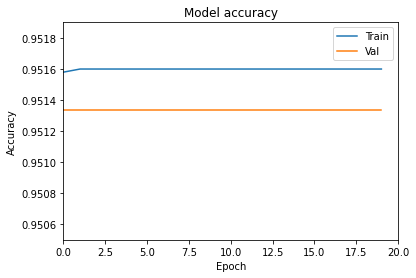

In [190]:
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(modelResult.history['accuracy'])
plt.plot(modelResult.history['val_accuracy'])
plt.axis([0,20,0.9505,0.9519])

plt.legend(['Train', 'Val'])
plt.show()

### Evaluation Metrics

In [206]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, accuracy_score

In [191]:
# initializing the data arrays to be used in evaluation metrics
y_pred = model.predict(X_test_reshaped)
y_test = np.argmax(Y_test_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)

12872/12872 [==============================] - 209s 16ms/step


In [211]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred, average='micro')
rs = recall_score(y_test, y_pred, average='micro')
f1s = f1_score(y_test, y_pred, average='micro')

In [212]:
print("The Accuracy score is:", round(acc*100,2), "%")
print("The Precision score is:", round(ps*100,2), "%")
print("The Recall score is:", round(rs*100,2), "%")
print("The F1 score is:", round(f1s*100,2), "%")
print("")
print("The confusion matrix is:")
print(cm)

The Accuracy score is: 95.19 %
The Precision score is: 95.19 %
The Recall score is: 95.19 %
The F1 score is: 95.19 %

The confusion matrix is:
[[392089      0]
 [ 19794      0]]


Find below a visualization of the effectiveness of the model as shown in a confusion matrix, as well as a short snippet of prediction vs. actual results.

Text(69.0, 0.5, 'Actual')

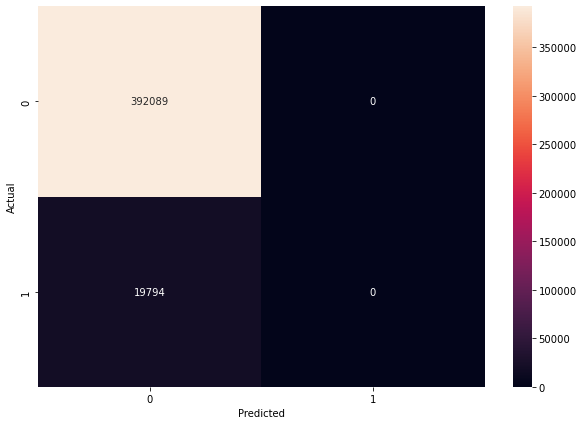

In [213]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

Looking at the confusion matrix, I realized that the ratio of normal to attack data was too imbalanced at 95:5, causing the model to predict ALL test cases as normal data. In hindsight, it was not a good dataset to train the machine learning model with such an imbalanced dataset where the model would not be able to accurately learn the traits of attack data, but rather the normal data, which is not the aim of our project.

Since the model predicted ALL test cases as normal data, this still achieves a 95% accuracy as shown above, since 95% of the data are indeed normal. No data is flagged for being attack and the True negative value is 0. This defeats the purpose of the training as we are supposed to be identifying attack data, and in such scenarios, false positives are a better outcome than false negatives - which is what we got.

To counter this, we will be using the partition dataset as provided by the authors of this dataset, where the ratio is better at 64:36.

### Using the partition sample dataset

It was stated in the UNSW-NB15 document that the training set has 175k records, and testing set 82k records. However, the downloaded files show that the testing set comprises more items than the training set, therefore we will be swapping both sets and allocating the larger dataset to the training set.

In [5]:
df_train = pd.read_csv("./UNSW_NB15_testing-set.csv")
df_test = pd.read_csv("./UNSW_NB15_training-set.csv")

In [6]:
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  175341
Length of testing set:  82332


In [7]:
features = pd.read_csv("./UNSW-NB15_features.csv",encoding='cp1252')
features

,No,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [8]:
df_p = pd.concat([df_train, df_test],ignore_index=True)
df_p.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

Checking for any duplicated or null values in the dataset so that we are able to remove them.

In [10]:
print("Duplicated:", df_p.duplicated().sum())

Duplicated: 0


In [11]:
print("Null values:")
print(df_p.isna().sum())

Null values:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      

We can drop the ID column as pandas dataframes already come with IDs, and they are purely for identification purposes. We will also be dropping the 'Attack category' column as this is a binary identification project, and we do not need to know what type of an attack it is.

In [12]:
attack_cat_p = df_p['attack_cat']

df_p = df_p.drop(columns=['id','attack_cat'])

df_p.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [13]:
df_p.sample(10)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
114690,0.000008,mhrp,-,INT,2,0,200,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,1
178343,0.000009,unas,-,INT,2,0,200,0,111111.107200,254,...,3,3,7,0,0,0,3,7,0,1
227563,0.488077,tcp,-,FIN,10,6,534,268,30.732855,254,...,1,1,1,0,0,0,2,4,0,1
213809,1.524140,tcp,smtp,FIN,52,42,37228,3380,61.018017,31,...,1,1,1,0,0,0,1,3,0,0
53299,0.000015,udp,-,INT,2,0,168,0,66666.668350,254,...,1,1,1,0,0,0,2,6,0,1
155205,0.000003,udp,dns,INT,2,0,114,0,333333.321500,254,...,41,19,49,0,0,0,42,49,0,1
79700,0.000008,udp,-,INT,2,0,104,0,125000.000300,254,...,4,1,4,0,0,0,4,4,0,1
245930,0.658704,tcp,-,FIN,10,6,534,268,22.771989,254,...,1,1,4,0,0,0,1,4,0,0
163019,0.000008,udp,dns,INT,2,0,114,0,125000.000300,254,...,9,9,25,0,0,0,9,25,0,1
87505,0.000009,unas,-,INT,2,0,200,0,111111.107200,254,...,4,4,14,0,0,0,6,11,0,1


#### Comparing the ratio of attack to normal data

The data is being labelled either 1 for attack data, or 0 for normal data.

<AxesSubplot:>

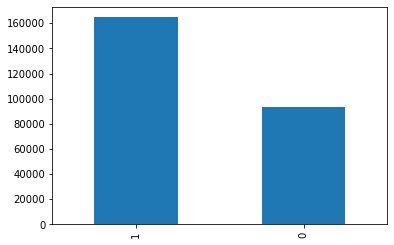

In [14]:
df_p['label'].value_counts().plot.bar()

In [15]:
df_p['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

The ratio of attack data to normal data is roughly about 3:1, which is a good mix of data.

### Data Visualization

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
attacks_p = attack_cat_p.value_counts()
attacks_p

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [21]:
valid_attacks_p = attacks_p[1:]
valid_attacks_p 

Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

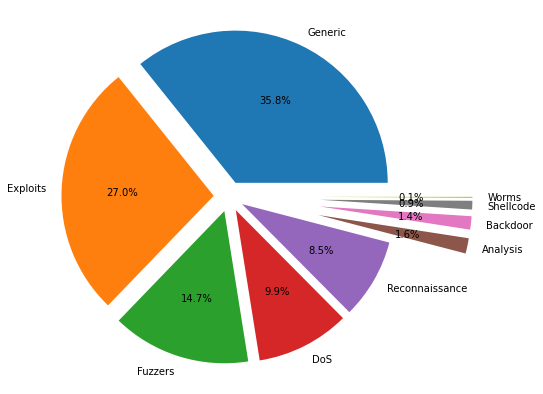

In [22]:
fig = plt.figure(figsize =(10, 7))
plt.pie(valid_attacks_p, labels = valid_attacks_p.index, autopct = '%1.1f%%', 
        explode=[0.1,0.1,0.1,0.1,0.1,0.6,0.6,0.6,0.6])
 
# show plot
plt.show()

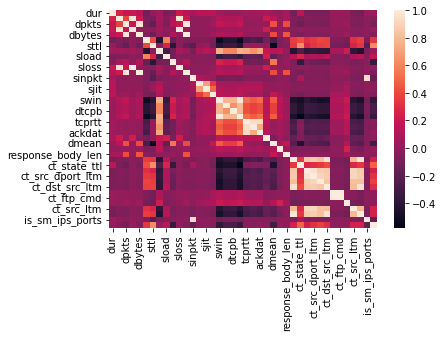

In [23]:
sns.heatmap(df_p.corr())
plt.show()

### Feature Engineering

Modification to the dataset to simplify the data, to remove any features that are not relevant to our project, as well as adding any new columns for a more comprehensive description to certain features. 

Categorical data would need to be one-hot-encoded so that they become numerical data instead, so that we can feed that data into machine learning algorithms.

In [24]:
categorical_columns_p = []
continous_columns_p = []
discrete_columns_p = []

for x in df_p.columns:
    if df_p[x].dtypes == 'O':
        categorical_columns_p.append(x)
    elif df_p[x].nunique()>20:
        continous_columns_p.append(x)  #infinite number of possibilities
    else:
        discrete_columns_p.append(x)  #finite number of values

In [25]:
categorical_columns_p

['proto', 'service', 'state']

#### One-Hot Encoding

Label Encoder method changes all categorical datas into numerical values from 1 to *n*, where *n* is the total number of unique datas in that certain columm.

In [26]:
he_df_p = df_p.copy()

In [27]:
he_df_p.sample(10)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
238722,0.000008,udp,dns,INT,2,0,114,0,125000.000300,254,...,3,3,3,0,0,0,3,3,0,1
140070,0.000003,udp,dns,INT,2,0,114,0,333333.321500,254,...,16,16,30,0,0,0,16,30,0,1
186935,2.326931,tcp,pop3,FIN,38,140,1750,162391,76.065857,62,...,1,1,1,0,0,0,1,1,0,1
44235,1.595981,tcp,-,FIN,12,10,1010,830,13.158051,254,...,1,1,3,0,0,0,1,3,0,0
233596,0.000007,udp,dns,INT,2,0,114,0,142857.140900,254,...,3,1,3,0,0,0,3,10,0,1
161021,0.000002,udp,dns,INT,2,0,114,0,500000.001300,254,...,16,16,23,0,0,0,17,23,0,1
248053,0.777212,tcp,-,FIN,10,6,642,268,19.299753,254,...,1,1,1,0,0,0,1,1,0,0
37949,0.046949,tcp,-,FIN,60,62,3598,48710,2577.264737,31,...,1,1,3,0,0,0,3,10,0,0
168740,0.379495,tcp,-,FIN,12,10,1466,1504,55.336698,254,...,1,1,1,0,0,0,1,2,0,1
177518,0.208939,tcp,http,FIN,10,6,1236,268,71.791288,254,...,1,1,1,0,0,1,1,1,0,1


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
for x in categorical_columns_p:
    he_df_p[x] = LabelEncoder().fit_transform(he_df_p[x])

In [30]:
he_df_p

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,119,0,5,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,0
257669,1.106101,113,0,4,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,0
257670,0.000000,6,0,5,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,0
257671,0.000000,6,0,5,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,0


However, the Label Encoding method may not be the most accurate to use as the different numerical values from 1 to *n* may be misunderstood by the ML model as different weights of importance - where a bigger number may be more important than a smaller number. However, this is not true as the different numbers represent different data. 

To counter this, we will use the One Hot Encoding method, where different data in the same column will be split up into different separate columns, and the corresponding data will be boolean, where 0 means an absence of that trait, while 1 means that the trait is present for that particular row of data. This way, the numerical data is unweighted and fairly regarded in the model.

In [31]:
ohe_df_p = pd.get_dummies(data=he_df_p, columns=['proto', 'service', 'state'])

In [32]:
ohe_df_p

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0
257669,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,0,0,1,0,0,0,0,0,0
257670,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,1,0,0,0,0,0
257671,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,1,0,0,0,0,0


In [33]:
ohe_df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Columns: 197 entries, dur to state_10
dtypes: float64(11), int64(29), uint8(157)
memory usage: 117.2 MB


### Splitting training and testing sets

First, we will set the Y labels to be the *label* column from the dataframe, then remove the *label* from the dataframe to get the X variables portion.

In [34]:
from sklearn.model_selection import train_test_split

In [57]:
Y_p = ohe_df_p['label']

X_p = ohe_df_p.copy()
X_p = X_p.drop(columns=['label'])

feature_list_p = list(X_p.columns)

X_p = np.array(X_p)

Next, we will split the dataframe into 60% training data, and 40% testing and validation data.


In [58]:
X_train_p, X_testval_p, Y_train_p, Y_testval_p = train_test_split(X_p, Y_p, test_size = 0.4)

In [59]:
len(X_p), len(Y_p), len(X_train_p), len(Y_train_p), len(X_testval_p), len(Y_testval_p)

(257673, 257673, 154603, 154603, 103070, 103070)

Then, we will split the 40% testing and validation data set into 20% testing and 20% validation data.

In [60]:
X_test_p, X_val_p, Y_test_p, Y_val_p = train_test_split(X_testval_p, Y_testval_p, test_size = 0.5)

In [61]:
len(X_testval_p), len(Y_testval_p), len(X_test_p), len(Y_test_p), len(X_val_p), len(Y_val_p)

(103070, 103070, 51535, 51535, 51535, 51535)

In [62]:
feature_list_p

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'proto_0',
 'proto_1',
 'proto_2',
 'proto_3',
 'proto_4',
 'proto_5',
 'proto_6',
 'proto_7',
 'proto_8',
 'proto_9',
 'proto_10',
 'proto_11',
 'proto_12',
 'proto_13',
 'proto_14',
 'proto_15',
 'proto_16',
 'proto_17',
 'proto_18',
 'proto_19',
 'proto_20',
 'proto_21',
 'proto_22',
 'proto_23',
 'proto_24',
 'proto_25',
 'proto_26',
 'proto_27',
 'proto_28',
 'proto_29',
 'proto_30',
 'proto_31',
 'proto_32',
 'proto_33',
 'proto_34',
 'proto_35',
 'proto_36',
 'proto_37',
 'proto_38',
 'prot

### Ensuring datasets are suitable

In [63]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [65]:
from keras.utils import to_categorical

In [66]:
print(X_train_p.shape)

(154603, 196)


Reshaping the X and Y data sets so that the data will be a suitable shape to fit with the model.

In [67]:
X_train_reshaped_p = np.reshape(X_train_p, (X_train_p.shape[0], X_train_p.shape[1], 1, 1))
Y_train_encoded_p = to_categorical(Y_train_p, num_classes=2)

In [68]:
X_test_reshaped_p = X_test_p.reshape((X_test_p.shape[0], X_test_p.shape[1], 1, 1))
Y_test_encoded_p = to_categorical(Y_test_p, num_classes=2)

In [69]:
X_val_reshaped_p = X_val_p.reshape((X_val_p.shape[0], X_val_p.shape[1], 1, 1))
Y_val_encoded_p = to_categorical(Y_val_p, num_classes=2)

#### Model Training

In [70]:
model_p = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(196,1,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(2, activation="softmax")
])

In [71]:
model_p.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [72]:
modelResult_p = model_p.fit(X_train_reshaped_p, Y_train_encoded_p, epochs=10, batch_size=32,
                    validation_data=(X_val_reshaped_p, Y_val_encoded_p))

Epoch 1/10
4832/4832 [==============================] - 43s 9ms/step - loss: 99335.3359 - accuracy: 0.7335 - val_loss: 3194.3206 - val_accuracy: 0.7967
Epoch 2/10
4832/4832 [==============================] - 46s 10ms/step - loss: 517.7371 - accuracy: 0.7868 - val_loss: 0.4413 - val_accuracy: 0.8250
Epoch 3/10
4832/4832 [==============================] - 48s 10ms/step - loss: 2.8760 - accuracy: 0.8342 - val_loss: 0.2989 - val_accuracy: 0.8761
Epoch 4/10
4832/4832 [==============================] - 54s 11ms/step - loss: 1.2129 - accuracy: 0.8856 - val_loss: 0.2630 - val_accuracy: 0.8882
Epoch 5/10
4832/4832 [==============================] - 52s 11ms/step - loss: 0.4415 - accuracy: 0.8948 - val_loss: 0.2407 - val_accuracy: 0.8973
Epoch 6/10
4832/4832 [==============================] - 52s 11ms/step - loss: 0.6364 - accuracy: 0.9031 - val_loss: 0.2270 - val_accuracy: 0.8998
Epoch 7/10
4832/4832 [==============================] - 54s 11ms/step - loss: 1.9973 - accuracy: 0.9063 - val_loss: 

In [73]:
model_p.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 1, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 1, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 1, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 1, 64)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 2)                 6

In [74]:
loss_p, accuracy_p = model_p.evaluate(X_test_reshaped_p, Y_test_encoded_p)
print('Test accuracy:', round(accuracy_p*100,2), "%")
print('Test loss:', round(loss_p*100,2), "%")

1611/1611 [==============================] - 7s 4ms/step - loss: 0.1848 - accuracy: 0.9143
Test accuracy: 91.43 %
Test loss: 18.48 %


### Evaluation Metrics

In [75]:
import matplotlib.pyplot as plt

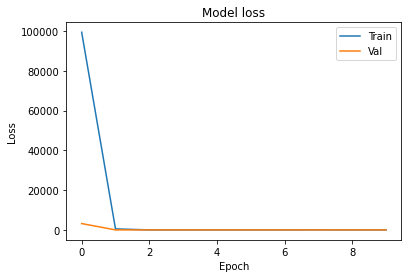

In [76]:
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(modelResult_p.history['loss'])
plt.plot(modelResult_p.history['val_loss'])

plt.legend(['Train', 'Val'])
plt.show()

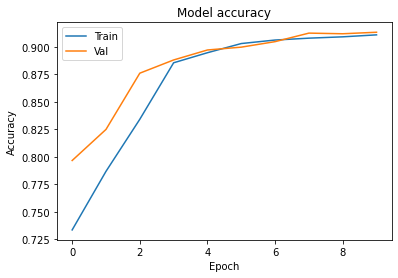

In [77]:
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(modelResult_p.history['accuracy'])
plt.plot(modelResult_p.history['val_accuracy'])

plt.legend(['Train', 'Val'])
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, accuracy_score

In [79]:
# initializing the data arrays to be used in evaluation metrics
y_pred_p = model_p.predict(X_test_reshaped_p)
y_test_p = np.argmax(Y_test_encoded_p, axis=1)
y_pred_p = np.argmax(y_pred_p, axis=1)

1611/1611 [==============================] - 5s 3ms/step


In [80]:
cm_p = confusion_matrix(y_test_p, y_pred_p)
acc_p = accuracy_score(y_test_p, y_pred_p)
ps_p = precision_score(y_test_p, y_pred_p, average='micro')
rs_p = recall_score(y_test_p, y_pred_p, average='micro')
f1s_p = f1_score(y_test_p, y_pred_p, average='micro')

In [81]:
print("The Accuracy score is:", round(acc_p*100,2), "%")
print("The Precision score is:", round(ps_p*100,2), "%")
print("The Recall score is:", round(rs_p*100,2), "%")
print("The F1 score is:", round(f1s_p*100,2), "%")
print("")
print("The confusion matrix is:")
print(cm_p)

The Accuracy score is: 91.43 %
The Precision score is: 91.43 %
The Recall score is: 91.43 %
The F1 score is: 91.43 %

The confusion matrix is:
[[16304  2197]
 [ 2217 30817]]


Text(69.0, 0.5, 'Actual')

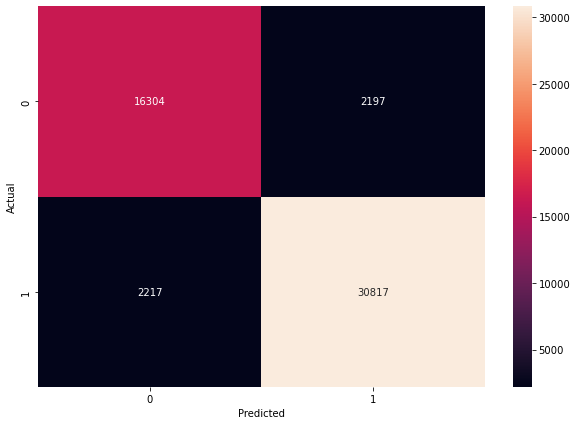

In [82]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_p, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [117]:
print("10 Random predicted values:", y_pred_p[330:340])
print("10 Random actual values:   ", y_test_p[330:340])

10 Random predicted values: [1 1 1 0 1 0 0 0 1 1]
10 Random actual values:    [1 1 1 0 1 0 0 0 1 1]


Printing the 10 random values in both the predicted set and the actual set shows that 10 out of 10 were correct, which is a 100% in this tiny subset.

From here, we will tweak some of the parameters to see if it helps improve the model to get a more accurate answer.

### 2 Layers and 20 Epochs

In [84]:
model_p2 = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(196,1,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(2, activation="softmax")
])

In [85]:
model_p2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [86]:
modelResult_p2 = model_p2.fit(X_train_reshaped_p, Y_train_encoded_p, epochs=20, batch_size=32,
                    validation_data=(X_val_reshaped_p, Y_val_encoded_p))

Epoch 1/20
4832/4832 [==============================] - 48s 10ms/step - loss: 103731.4141 - accuracy: 0.7316 - val_loss: 205.9250 - val_accuracy: 0.8003
Epoch 2/20
4832/4832 [==============================] - 49s 10ms/step - loss: 16.3850 - accuracy: 0.7935 - val_loss: 0.3962 - val_accuracy: 0.8252
Epoch 3/20
4832/4832 [==============================] - 46s 10ms/step - loss: 0.3232 - accuracy: 0.8642 - val_loss: 0.3041 - val_accuracy: 0.8783
Epoch 4/20
4832/4832 [==============================] - 47s 10ms/step - loss: 35.7048 - accuracy: 0.8697 - val_loss: 0.2781 - val_accuracy: 0.8910
Epoch 5/20
4832/4832 [==============================] - 46s 10ms/step - loss: 1.7896 - accuracy: 0.8949 - val_loss: 0.2379 - val_accuracy: 0.8949
Epoch 6/20
4832/4832 [==============================] - 47s 10ms/step - loss: 1.2493 - accuracy: 0.8996 - val_loss: 0.2241 - val_accuracy: 0.9018
Epoch 7/20
4832/4832 [==============================] - 50s 10ms/step - loss: 22.1516 - accuracy: 0.9021 - val_loss

In [87]:
model_p2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 196, 1, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 1, 32)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 1, 64)         18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 1, 64)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [88]:
loss_p2, accuracy_p2 = model_p2.evaluate(X_test_reshaped_p, Y_test_encoded_p)
print('Test accuracy:', round(accuracy_p2*100,2), "%")
print('Test loss:', round(loss_p2*100,2), "%")

1611/1611 [==============================] - 8s 5ms/step - loss: 0.1833 - accuracy: 0.9173
Test accuracy: 91.73 %
Test loss: 18.33 %


### 3 Layers and 20 Epochs

In [89]:
model_p3 = models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(196,1,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(2, activation="softmax")
])

In [90]:
model_p3.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [91]:
modelResult_p3 = model_p3.fit(X_train_reshaped_p, Y_train_encoded_p, epochs=20, batch_size=32,
                    validation_data=(X_val_reshaped_p, Y_val_encoded_p))

Epoch 1/20
4832/4832 [==============================] - 44s 9ms/step - loss: 24461.1465 - accuracy: 0.6942 - val_loss: 574.6736 - val_accuracy: 0.7498
Epoch 2/20
4832/4832 [==============================] - 50s 10ms/step - loss: 135.7142 - accuracy: 0.7705 - val_loss: 0.3698 - val_accuracy: 0.8341
Epoch 3/20
4832/4832 [==============================] - 45s 9ms/step - loss: 0.3285 - accuracy: 0.8644 - val_loss: 0.2666 - val_accuracy: 0.8882
Epoch 4/20
4832/4832 [==============================] - 48s 10ms/step - loss: 64.2725 - accuracy: 0.8962 - val_loss: 0.2713 - val_accuracy: 0.8927
Epoch 5/20
4832/4832 [==============================] - 47s 10ms/step - loss: 1.3325 - accuracy: 0.9015 - val_loss: 0.2454 - val_accuracy: 0.8913
Epoch 6/20
4832/4832 [==============================] - 49s 10ms/step - loss: 10.1918 - accuracy: 0.9052 - val_loss: 0.2018 - val_accuracy: 0.9051
Epoch 7/20
4832/4832 [==============================] - 45s 9ms/step - loss: 2.0848 - accuracy: 0.9073 - val_loss: 0

In [92]:
model_p3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 1, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 1, 16)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 98, 1, 32)         4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 1, 32)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 49, 1, 64)         18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 1, 64)       

In [93]:
loss_p3, accuracy_p3 = model_p3.evaluate(X_test_reshaped_p, Y_test_encoded_p)
print('Test accuracy:', round(accuracy_p3*100,2), "%")
print('Test loss:', round(loss_p3*100,2), "%")

1611/1611 [==============================] - 8s 5ms/step - loss: 0.1760 - accuracy: 0.9149
Test accuracy: 91.49 %
Test loss: 17.6 %


### 3 Layers and 10 Epochs

In [94]:
model_p4 = models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(196,1,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(2, activation="softmax")
])

In [95]:
model_p4.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [96]:
modelResult_p4 = model_p4.fit(X_train_reshaped_p, Y_train_encoded_p, epochs=10, batch_size=32,
                    validation_data=(X_val_reshaped_p, Y_val_encoded_p))

Epoch 1/10
4832/4832 [==============================] - 49s 10ms/step - loss: 22269.4922 - accuracy: 0.7065 - val_loss: 0.9510 - val_accuracy: 0.7443
Epoch 2/10
4832/4832 [==============================] - 46s 10ms/step - loss: 0.8435 - accuracy: 0.7838 - val_loss: 0.4806 - val_accuracy: 0.8122
Epoch 3/10
4832/4832 [==============================] - 48s 10ms/step - loss: 30.7155 - accuracy: 0.8503 - val_loss: 0.3460 - val_accuracy: 0.8502
Epoch 4/10
4832/4832 [==============================] - 46s 10ms/step - loss: 0.2866 - accuracy: 0.8804 - val_loss: 0.2391 - val_accuracy: 0.8919
Epoch 5/10
4832/4832 [==============================] - 47s 10ms/step - loss: 3.1804 - accuracy: 0.8889 - val_loss: 0.2321 - val_accuracy: 0.8925
Epoch 6/10
4832/4832 [==============================] - 48s 10ms/step - loss: 8.7637 - accuracy: 0.8977 - val_loss: 0.2150 - val_accuracy: 0.9028
Epoch 7/10
4832/4832 [==============================] - 55s 11ms/step - loss: 0.2094 - accuracy: 0.9049 - val_loss: 0.2

In [97]:
model_p4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 196, 1, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 98, 1, 16)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 98, 1, 32)         4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 1, 32)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 49, 1, 64)         18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 1, 64)       

In [124]:
loss_p4, accuracy_p4 = model_p4.evaluate(X_test_reshaped_p, Y_test_encoded_p)
print('Test accuracy:', round(accuracy_p4*100,2), "%")
print('Test loss:', round(loss_p4*100,2), "%")

1611/1611 [==============================] - 12s 8ms/step - loss: 0.1895 - accuracy: 0.9113
Test accuracy: 91.13 %
Test loss: 18.95 %


### 3 Layers and 25 Epochs

In [103]:
model_p5 = models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(196,1,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(2, activation="softmax")
])

In [104]:
model_p5.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [105]:
modelResult_p5 = model_p5.fit(X_train_reshaped_p, Y_train_encoded_p, epochs=25, batch_size=32,
                    validation_data=(X_val_reshaped_p, Y_val_encoded_p))

Epoch 1/25
4832/4832 [==============================] - 53s 11ms/step - loss: 20724.6094 - accuracy: 0.7005 - val_loss: 6.8002 - val_accuracy: 0.7077
Epoch 2/25
4832/4832 [==============================] - 54s 11ms/step - loss: 1.9592 - accuracy: 0.7720 - val_loss: 0.4561 - val_accuracy: 0.7666
Epoch 3/25
4832/4832 [==============================] - 57s 12ms/step - loss: 31.8647 - accuracy: 0.8209 - val_loss: 0.3380 - val_accuracy: 0.8591
Epoch 4/25
4832/4832 [==============================] - 52s 11ms/step - loss: 2.5983 - accuracy: 0.8563 - val_loss: 0.3026 - val_accuracy: 0.8671
Epoch 5/25
4832/4832 [==============================] - 51s 11ms/step - loss: 30.4126 - accuracy: 0.8795 - val_loss: 0.2447 - val_accuracy: 0.8872
Epoch 6/25
4832/4832 [==============================] - 56s 12ms/step - loss: 5.9715 - accuracy: 0.8961 - val_loss: 0.2335 - val_accuracy: 0.8960
Epoch 7/25
4832/4832 [==============================] - 57s 12ms/step - loss: 0.2728 - accuracy: 0.9038 - val_loss: 0.

In [106]:
model_p5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 196, 1, 16)        160       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 98, 1, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 98, 1, 32)         4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 49, 1, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 49, 1, 64)         18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 25, 1, 64)       

In [125]:
loss_p5, accuracy_p5 = model_p5.evaluate(X_test_reshaped_p, Y_test_encoded_p)
print('Test accuracy:', round(accuracy_p5*100,2), "%")
print('Test loss:', round(loss_p5*100,2), "%")

1611/1611 [==============================] - 14s 9ms/step - loss: 0.1701 - accuracy: 0.9212
Test accuracy: 92.12 %
Test loss: 17.01 %


After trying different parameters, the test accuracy returns the highest at 3 layers and 25 epochs at 92.12%.

### Evaluation Metrics

In [108]:
import matplotlib.pyplot as plt

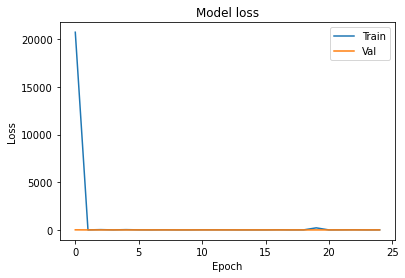

In [109]:
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(modelResult_p5.history['loss'])
plt.plot(modelResult_p5.history['val_loss'])

plt.legend(['Train', 'Val'])
plt.show()

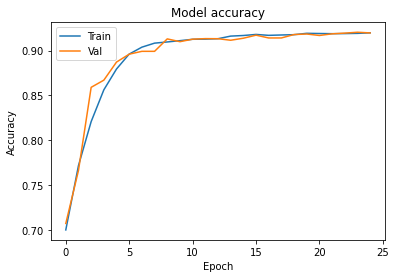

In [118]:
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(modelResult_p5.history['accuracy'])
plt.plot(modelResult_p5.history['val_accuracy'])

plt.legend(['Train', 'Val'])
plt.show()

In [111]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, accuracy_score

In [119]:
# initializing the data arrays to be used in evaluation metrics
y_pred_p = model_p5.predict(X_test_reshaped_p)
y_test_p = np.argmax(Y_test_encoded_p, axis=1)
y_pred_p = np.argmax(y_pred_p, axis=1)

1611/1611 [==============================] - 6s 4ms/step


In [120]:
cm_p = confusion_matrix(y_test_p, y_pred_p)
acc_p = accuracy_score(y_test_p, y_pred_p)
ps_p = precision_score(y_test_p, y_pred_p, average='micro')
rs_p = recall_score(y_test_p, y_pred_p, average='micro')
f1s_p = f1_score(y_test_p, y_pred_p, average='micro')

In [121]:
print("The Accuracy score is:", round(acc_p*100,2), "%")
print("The Precision score is:", round(ps_p*100,2), "%")
print("The Recall score is:", round(rs_p*100,2), "%")
print("The F1 score is:", round(f1s_p*100,2), "%")
print("")
print("The confusion matrix is:")
print(cm_p)

The Accuracy score is: 92.12 %
The Precision score is: 92.12 %
The Recall score is: 92.12 %
The F1 score is: 92.12 %

The confusion matrix is:
[[16899  1602]
 [ 2457 30577]]


Text(69.0, 0.5, 'Actual')

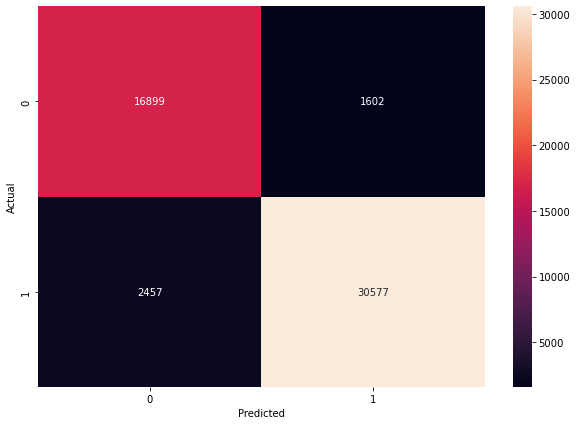

In [122]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_p, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [123]:
print("10 Random predicted values:", y_pred_p[460:470])
print("10 Random actual values:   ", y_test_p[460:470])

10 Random predicted values: [1 0 0 0 0 1 0 1 0 1]
10 Random actual values:    [1 0 0 1 0 1 0 1 0 1]


Printing the 10 random values in both the predicted set and the actual set shows that 9 out of 10 were correct, which is a 90% in this tiny subset.

## References

[1] M. Badole. (2023, June 19) *Difference Between fit(), transform(), and fit_transform() Methods in Scikit-Learn* Analytics Vidhya. Retrieved June 25, 2023 from https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

[2] w3schools. (n.d.) *Matplotlib Pie Charts* w3schools. Retrieved June 25, 2023 from  https://www.w3schools.com/python/matplotlib_pie_charts.asp

[3] pandas.pydata.org. (n.d.) *One Hot Encoding -pandas.get_dummies.* pandas.pydata.org. Retrieved June 25, 2023 from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

[4] fchollet (2020, April 12) *The Sequential model.* keras.io. Retrieved June 28, 2023 from https://keras.io/guides/sequential_model/

[5] matplotlib (n.d.) *matplotlib.pyplot summary* matplotlib.org. Retrieved June 28, 2023 from https://matplotlib.org/stable/api/pyplot_summary.html
